# Engenharia do Conhecimento 2022/2023

## TP04: Linear models for Regression and Classification

*A Machine Learning Tutorial by Andre Falcao (DI/FCUL 2021-2022)*

*Revised by Catia Pesquita (2022-2023)*

### Summary

1. The essence of Linear Regression
2. Linear Regression in Scikit-Learn
3. Regularized Models: Ridge Regression and Lasso
4. Logistic Regression for Classification 


## 1. The essence of Linear Regression

### 1.1. Computing Linear regression manually


We know that the parameters of a linear model can be computed according to the equation

$\beta = (X^T.X)^{-1}.X^T.Y $ 

Let's check it out for the [diabetes dataset form the toy examples of scikit learn](https://scikit-learn.org/stable/datasets/toy_dataset.html) that has 10 independent variables


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
X_diabetes, y_diabetes=load_diabetes(return_X_y=True)


pd.DataFrame(X_diabetes)

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


To use this procedure we first need to add one `[1]` column to the whole dataset that will emcompass the the bias of the model (intercept)

In [2]:
X1 = np.insert(X_diabetes, 0, 1, axis=1)
X1.shape

(442, 11)

Now we will divide the full dataset into training and testing

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X1, y_diabetes, test_size=0.33, random_state=22)


the following procedure just computes the Beta parameters by using sequentially the equation above

In [4]:
Xtt=np.transpose(X_train) #Xtt - the transposed X matrix (XT)
print(Xtt.shape) #<-check the matrix dimensions
gram=np.dot(Xtt, X_train) #the dot product between XT and X (XT.X)
print(gram.shape) #<-check the matrix dimensions
gram_inv=np.linalg.inv(gram) #now we invert: (XT.X)^-1
print(gram_inv.shape) #<-check the matrix dimensions
X_part = np.dot(gram_inv,Xtt) #XT (XT.X)^-1 .XT
print(X_part.shape) #<-check the matrix dimensions 
Beta_est=np.dot(X_part, y_train) #XT (XT.X)^-1 .XT .Y

print(Beta_est) #the values of all betas for 0...N

print("The bias is: %9.3f" % Beta_est[0]) #this is the intercept, beta_zero, or alpha 
print("The other parameters are: ") #these are the remaining coefficients 
for i, beta in enumerate(Beta_est[1:]):
    print("\t B%d -> %9.3f"% (i+1, beta))


(11, 296)
(11, 11)
(11, 11)
(11, 296)
[ 151.46118406   21.36238583 -280.55611945  487.07538303  322.65687822
 -557.08917958  330.73598263 -183.06775423   39.13072884  656.84884333
  117.36897137]
The bias is:   151.461
The other parameters are: 
	 B1 ->    21.362
	 B2 ->  -280.556
	 B3 ->   487.075
	 B4 ->   322.657
	 B5 ->  -557.089
	 B6 ->   330.736
	 B7 ->  -183.068
	 B8 ->    39.131
	 B9 ->   656.849
	 B10 ->   117.369



Making predictions is trivial. It is just a matrix multiplication of the parameters with the dataset for which we want to make predictions

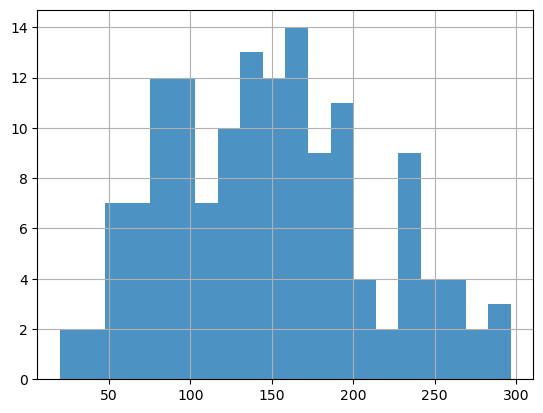

In [5]:
import matplotlib.pyplot as plt
#computes predicted values by taking the x values and muliplying be the corresponding beta coefficients
my_preds=np.dot(X_test,Beta_est) 

#histogram of predicted values
plt.hist(my_preds, bins=20, alpha=.8)
plt.grid()
plt.show()

Let's compute some usual regression statistics

In [6]:
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr

def printRegStatistics(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval = pearsonr(truth, preds)
    print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))
    print("The Maximum Error is is: ", max_error(truth, preds))
    print("The Mean Absolute Error is: ", mean_absolute_error(truth, preds))

printRegStatistics(y_test, my_preds)

The RVE is:  0.5108392105125008
The rmse is:  54.52254066627124
The Correlation Score is is: 0.7194 (p-value=1.493174e-24)

The Maximum Error is is:  159.00778397535097
The Mean Absolute Error is:  42.02788673635458


And compare graphically the results to the actual y values (y_test) 

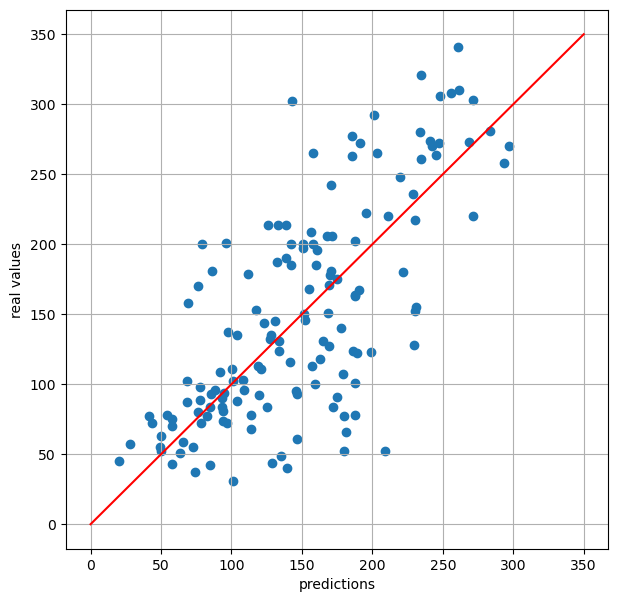

In [7]:
plt.figure(figsize=(7,7))
plt.scatter(my_preds, y_test)
plt.grid()
#this is the 45degrees angle. The closer the predictions approach this, the better the model
plt.plot([0, 350], [0, 350], c="r")
plt.xlabel("predictions")
plt.ylabel("real values")
plt.show()

## 2. Linear regression with Python libraries

### 2.1 Using scikit-learn

The only difference to the above procedure that we have used for fitting our model is that here we will use the original X matrix and not X1 (which has an extra **ONE** column), so we will need to do a new train-test split this time with the original data

In [8]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.33, random_state=22)


reg = LinearRegression().fit(X_train, y_train)
print("The score is: ", reg.score(X_train, y_train))

print("The bias is: ",  reg.intercept_)
print("The other parameters are: ")
for i, beta in enumerate(reg.coef_):
    print("\t B%d -> %9.3f"% (i+1, beta))

The score is:  0.5123759199075687
The bias is:  151.46118405835978
The other parameters are: 
	 B1 ->    21.362
	 B2 ->  -280.556
	 B3 ->   487.075
	 B4 ->   322.657
	 B5 ->  -557.089
	 B6 ->   330.736
	 B7 ->  -183.068
	 B8 ->    39.131
	 B9 ->   656.849
	 B10 ->   117.369


Compare the results with the values provided with the ones computed above. They should be exactly the same! A linear regression is a stable model - always gives the same result.

Similarly let's examine the predictions graphically (should be exactly equal)

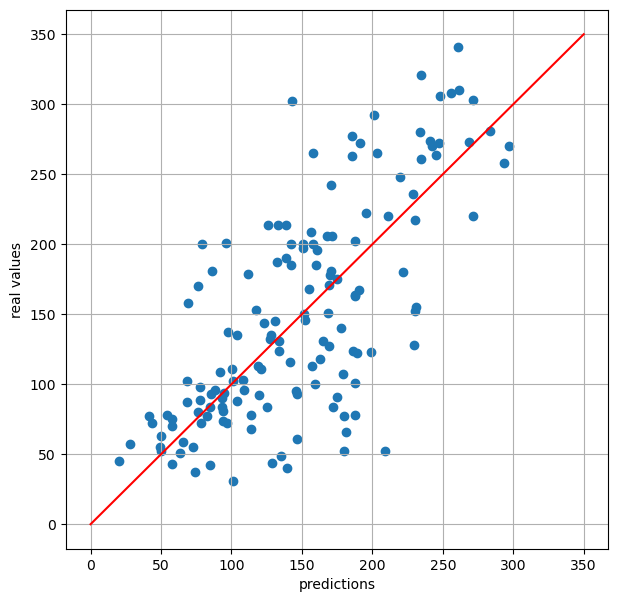

In [9]:
preds=reg.predict(X_test)
plt.figure(figsize=(7,7))
plt.scatter(preds, y_test)
plt.grid()
plt.plot([0, 350], [0, 350], c="r")
plt.xlabel("predictions")
plt.ylabel("real values")
plt.show()

## 3. Regularized linear models

Regularized models impose boundaries on the fitted parameters, so that it is possible to have sensitivity which variables appear most relevant for explaining the dependent `y`. The problem is that these boundaries add constraints and simple optimization of the MSE is no longer possible, requiring more complex fitting algorithms

There essentially 3 Regularized linear models
* Ridge Regression
* Lasso (Least Absolute Shrinkage and Selection Operator)
* Elastic nets

For this class we will only discuss Ridge and Lasso, as Elastic nets are a weighted compromise betwen these two approaches. 

### 3.1 Ridge Regression

Ridge regression applies L2 regularization, that is, it minimizes not only the MSEs (mean squared errors), but including the squared values of the parameters estimator, thus:

$cost(\beta) = MSE(\beta) + \frac{\alpha}{2}\sum^{n}_{i=1}{\beta_i^2}$

This will make that only a really necessary column will enter the model. Critical for understating this is the value of $\alpha$ which defines how much to penalize the actual values. This penalization will emphasize the importance of each variable in its contribution for explaining `y` Higher values of $\alpha$, will cause smaller $\beta$

Selecting a value of  $\alpha=10$

In [10]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=10, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  ridge.intercept_)
print("The other parameters are: ")
for i, beta in enumerate(ridge.coef_):
    print("\t B%02d -> %9.3f"% (i+1, beta))
    

The bias is:  152.9312593576113
The other parameters are: 
	 B01 ->    15.723
	 B02 ->    -0.359
	 B03 ->    51.061
	 B04 ->    35.040
	 B05 ->    16.118
	 B06 ->    11.570
	 B07 ->   -34.383
	 B08 ->    35.971
	 B09 ->    50.405
	 B10 ->    32.026


We can of course compute the general regression statistics for the regularized model

In [11]:
preds=ridge.predict(X_test)
printRegStatistics(y_test, preds)

The RVE is:  0.1465841056202376
The rmse is:  72.00659086665564
The Correlation Score is is: 0.6543 (p-value=3.375181e-19)

The Maximum Error is is:  172.84346048834522
The Mean Absolute Error is:  62.07113169721695


Changing the $\alpha$ value will have a dramatic impact on the parameters estimated as well as on the regression results. for instance for  $\alpha=0.1$ we will have

In [12]:
ridge = Ridge(alpha=0.1, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  ridge.intercept_)
print("The other parameters are: ")
for i, beta in enumerate(ridge.coef_):
    print("\t B%02d -> %9.3f"% (i+1, beta))
preds=ridge.predict(X_test)
printRegStatistics(y_test, preds)

The bias is:  151.64853435413357
The other parameters are: 
	 B01 ->    28.967
	 B02 ->  -223.420
	 B03 ->   450.657
	 B04 ->   288.302
	 B05 ->   -75.352
	 B06 ->   -67.400
	 B07 ->  -282.016
	 B08 ->   101.330
	 B09 ->   405.476
	 B10 ->   123.951
The RVE is:  0.5136354144942683
The rmse is:  54.348422646816545
The Correlation Score is is: 0.7168 (p-value=2.577269e-24)

The Maximum Error is is:  161.4137933341915
The Mean Absolute Error is:  42.37103699382136


For very low $\alpha$ values the model is equivalent to the unconstrained model

In [13]:
ridge = Ridge(alpha=0.0001, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  ridge.intercept_)
print("The other parameters are: ")
for i, beta in enumerate(ridge.coef_):
    print("\t B%02d -> %9.3f"% (i+1, beta))
preds=ridge.predict(X_test)
printRegStatistics(y_test, preds)

The bias is:  151.46097126342548
The other parameters are: 
	 B01 ->    21.430
	 B02 ->  -280.523
	 B03 ->   487.128
	 B04 ->   322.561
	 B05 ->  -548.124
	 B06 ->   323.643
	 B07 ->  -187.129
	 B08 ->    38.020
	 B09 ->   653.382
	 B10 ->   117.365
The RVE is:  0.5107435605205579
The rmse is:  54.527887668436954
The Correlation Score is is: 0.7193 (p-value=1.517274e-24)

The Maximum Error is is:  159.02438937302173
The Mean Absolute Error is:  42.03172603991234


Now is there any value of $\alpha$ that actually is better for the current train/test partition? Let's check the rmse for different values and plot the results


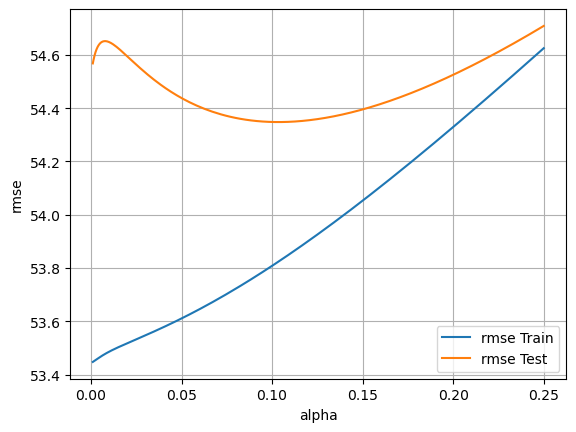

In [14]:
#this is a simple cross-validation

rmse_train = []
rmse_test = []
alphas=2**np.arange(-2,-10,-.05)
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    preds_tr=ridge.predict(X_train)
    preds_te=ridge.predict(X_test)
    rmse_train.append(mean_squared_error(y_train, preds_tr, squared=False))
    rmse_test.append(mean_squared_error(y_test, preds_te, squared=False))
    
plt.plot(alphas, rmse_train, label="rmse Train")    
plt.plot(alphas, rmse_test, label="rmse Test")  
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.grid()
plt.legend()
plt.show()

it is possible to inspect the values of the different parameters as $\alpha$ changes

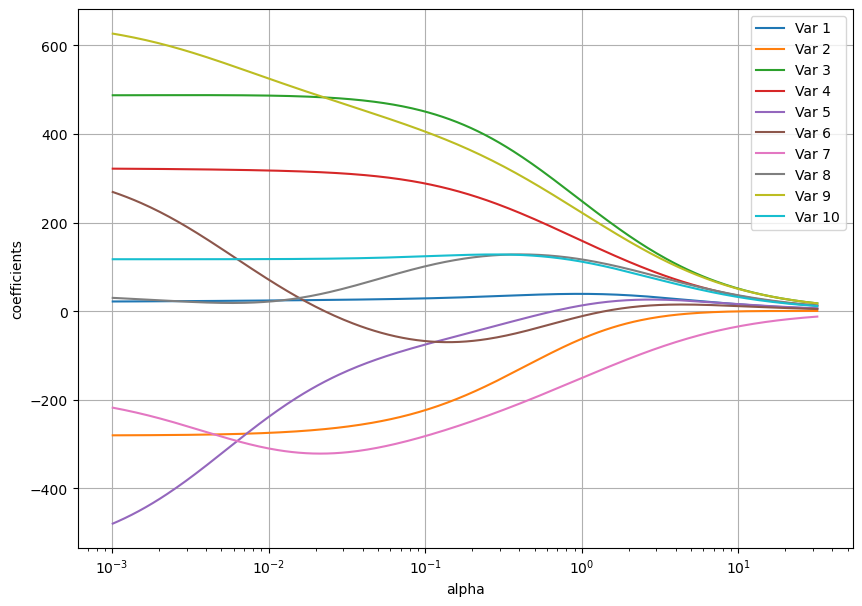

In [15]:
#compute coefficients for many alpha values
coefs=[]

#generate a list of alphas to test between -10 and 5, with a 0.1 interval
#296 different alphas to test, which is more than we tested above
alphas=2**np.arange(5,-10,-.05) 


for alpha in alphas:
    ridge= Ridge(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    coefs.append(ridge.coef_)
coefs=np.array(coefs)

#plot results
N,M=X_train.shape #get number of rows(N) which correspond to alphas and columns(M) which correspond to the variables)
plt.figure(figsize=(10,7))
for i in range(M):
    plt.plot(alphas, coefs[:,i], label="Var %d" % (i+1)) #the coefficents of variable i for each alpha value
    
plt.xscale("log")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.grid()
plt.show()





/Users/cpesquita/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


The best alpha is:  0.05076577477226588


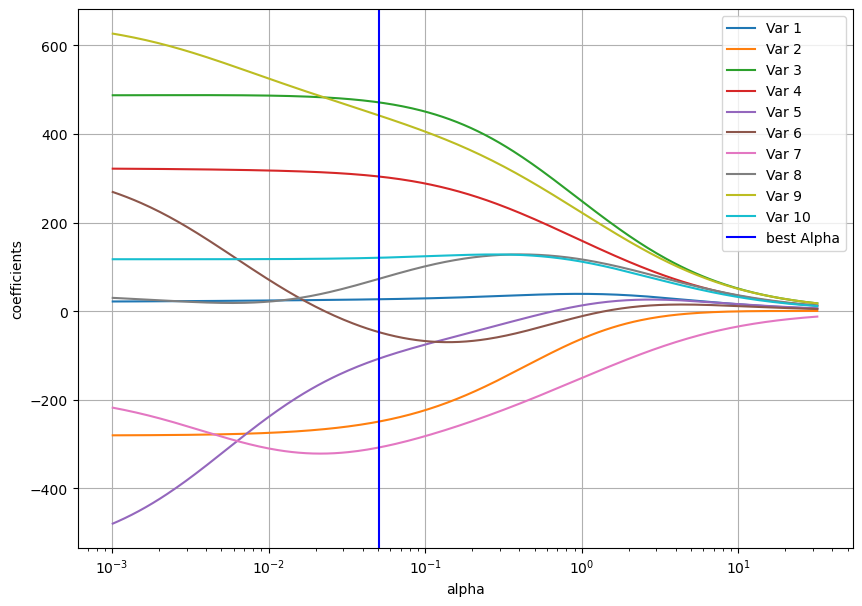

In [16]:

#lets find the best alpha using cross-validation on the training data  
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = alphas).fit(X_train, y_train)
print("The best alpha is: ",ridge_cv.alpha_)



#plot results
N,M=X_train.shape #get number of rows(N) which correspond to alphas and columns(M) which correspond to the variables)
plt.figure(figsize=(10,7))
for i in range(M):
    plt.plot(alphas, coefs[:,i], label="Var %d" % (i+1)) #the coefficents of variable i for each alpha value
plt.axvline(x = ridge_cv.alpha_, color = 'b', label = 'best Alpha')
plt.xscale("log")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.grid()
plt.show()





In [17]:

#Now let's fit the linear regression using the best alpha and evaluate on the test set
ridge = Ridge(alpha=alpha, max_iter=100000).fit(X_train, y_train)
preds=ridge.predict(X_test)
printRegStatistics(y_test, preds)

The RVE is:  0.5100185667473209
The rmse is:  54.56831402133435
The Correlation Score is is: 0.7187 (p-value=1.717054e-24)

The Maximum Error is is:  159.15926726135325
The Mean Absolute Error is:  42.059581791678184



## Exercise 1:
    1.1 Compare the results obtained with alpha=10, alpha=0.0001 and the best alpha. What can you conclude?
    1.2 Did you notice a difference in the best alpha found using the single cross validation and the simple validation?

### 3.2 The Lasso

The Lasso (Least Absolute Shrinkage and Selection Operator) is similar to Ridge regression but it uses L1 regularization, that is, it minimizes not only the MSEs, but including the modulus values of the parameters estimators, which will have a very important effect on the actual parameters:

$cost(\beta) = MSE(\theta) + \alpha\sum^{n}_{i=1}{|\beta_i|}$

This will make that only really necessary variables will enter the model. Similar to Ridge regression the  $\alpha$ parameter defines how much to penalize the actual parameters. This penalization will emphasize the importance of each variable in its contribution for explaining `y`. 
Higher values of $\alpha$, will cause smaller $\beta$. However different from Ridge regression, due to the nature of the modulus function, for high alpha values only a few variables will enter the model. This is a very important criterion for actually identifying the most important variables in a model.

Selecting a value of  $\alpha=2$, for instance will get only one variable in the model ($x_9$), suggesting it is one of the most important for explaining `y`.

In [18]:
L = Lasso(alpha=2, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  L.intercept_)
print("The other parameters are: ")
for i, beta in enumerate(L.coef_):
    print("\t B%02d -> %9.3f"% (i+1, beta))
preds=L.predict(X_test)
printRegStatistics(y_test, preds)

The bias is:  153.1897997673581
The other parameters are: 
	 B01 ->     0.000
	 B02 ->     0.000
	 B03 ->     0.000
	 B04 ->     0.000
	 B05 ->     0.000
	 B06 ->     0.000
	 B07 ->    -0.000
	 B08 ->     0.000
	 B09 ->    19.129
	 B10 ->     0.000
The RVE is:  0.01321417220970389
The rmse is:  77.45142483476891
The Correlation Score is is: 0.5706 (p-value=5.558340e-14)

The Maximum Error is is:  187.80500709024923
The Mean Absolute Error is:  66.30618797143049


Making  $\alpha=0.5$ will impact the model deeply, showing now 4 active variables and an apparent increase in the model statistics

In [19]:
L = Lasso(alpha=.5, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  L.intercept_)
print("The other parameters are: ")
for i, beta in enumerate(L.coef_):
    print("\t B%02d -> %9.3f"% (i+1, beta))
preds=L.predict(X_test)
printRegStatistics(y_test, preds)

The bias is:  151.69898017618524
The other parameters are: 
	 B01 ->     0.000
	 B02 ->    -0.000
	 B03 ->   432.963
	 B04 ->   115.650
	 B05 ->    -0.000
	 B06 ->     0.000
	 B07 ->  -103.580
	 B08 ->     0.000
	 B09 ->   418.557
	 B10 ->     0.000
The RVE is:  0.48264529338989104
The rmse is:  56.04815217259216
The Correlation Score is is: 0.7190 (p-value=1.613887e-24)

The Maximum Error is is:  147.8597955378034
The Mean Absolute Error is:  46.358297356019285


## Exercise 2:
Repeat the procedure above described for Ridge regression, but now adapted for the Lasso.

2.1 Use simple validation to decide on the best alpha value. 

2.2 See how the best alpha value impacts the values of the coefficients. How many are not zero?

2.3 Plot the RMSE vs. alpha values.

2.4 Plot the distribution of alpha values and coefficients.

2.5 Use cross-validation (lookup the corresponding function to RidgeCV for Lasso on scikit-learn)


## 4. Logistic regression

Despite the name, Logistic regression only uses regression methods for fitting, but what is fitted is the probability of belonging to a given class, making this a classification method. This probability function is totaly non-linear.


### 4.1. A very simple explanation of Logistic Regression

We will explain Logistic Regression using articially created data in two different files. One with positive and thge other with negative samples


In [20]:
lines=open("pos_smps.txt", "rt").readlines()
poss=np.array([float(lin) for lin in lines]).reshape(-1, 1) #array of positive examples
Np=poss.shape[0] #number of positive examples
lines=open("neg_smps.txt", "rt").readlines()
negs=np.array([float(lin) for lin in lines]).reshape(-1, 1) #array of negative examples
Nn=negs.shape[0]  #number of positive examples


yp=np.ones(Np) #array of labels for positive examples
yn=np.zeros(Nn) #array of labels for negative examples


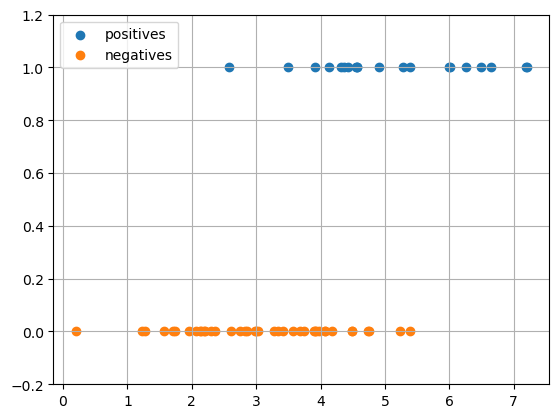

In [21]:
#plot the examples. for positives: y=1, for negatives: y=0
plt.scatter(poss, yp, label="positives")
plt.scatter(negs, yn, label="negatives")
plt.ylim([-0.2, 1.2])
plt.legend()
plt.grid()
plt.show()

We want to fit a logistic regression that will assign a probability that each instance is positive. That probability cab be defined with a logistic function, with a characteristic sigmoid shape:

$p=\dfrac{1}{1+e^{-(\beta_0+\beta_1.x)}}$

this probability logistic curve is the probability curve. For each value of x, according to this logistic function we can compute the probability of each instance being positive. For this case, as it can be seen the largest the X, the highest the probability of it being positive. 

For illustration purposes as an initial guess, we are just going to assume two estimates for $\beta_0$ and $\beta_1$: 

* $\beta_0= -10.0$
* $\beta_1= 4.0$



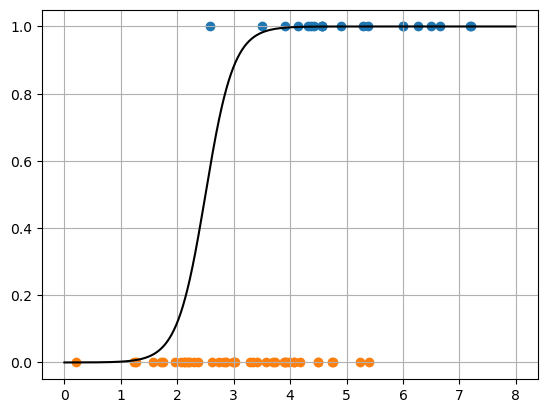

In [22]:
#let's plot
b0 =-10.0
b1 = 4.0
x=np.arange(0, 8, 0.01) #x values to plot the
p= 1/(1+np.exp(-(b0+b1*x))) #probability logistic

plt.plot(x, p, c="k")
plt.scatter(poss, yp)
plt.scatter(negs, yn)
plt.grid()
plt.show()

We can solve the above equation relative to the probability to find that this curve is in fact a linear representation of the log odds. This *log odds* is the logarithm of the ratio that some instance is positive to the probability of it being negative:

$\log(\frac{p}{1-p})=\beta_0+\beta_1.x$

Now the log odds does not support neither the value of `p=1` neither `p=0`, each case implying $+\infty$  and $-\infty$ respectively. However we can project each point in the new line

This can be represented graphically

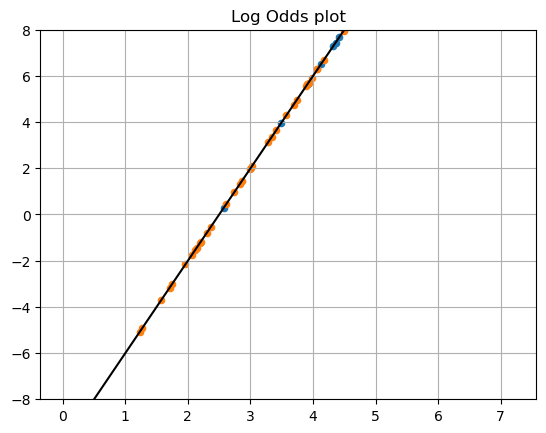

In [23]:

pp_lo = b0 + b1*poss  #log odds for positives
pn_lo = b0 + b1*negs  #log odds for negatives

plt.scatter(poss, pp_lo, s = 20)
plt.scatter(negs, pn_lo, s = 20)

plt.axline((0, b0), slope=b1, c="k") #the linear regression

plt.ylim([-8,8])
plt.title("Log Odds plot")
plt.grid()


We could of course project our samples into the logistic curve. The points above the 0.5 line are the points that should be considered that have a higher likelyhood of being positive, and for those below, have a higher likelyhood of being negative

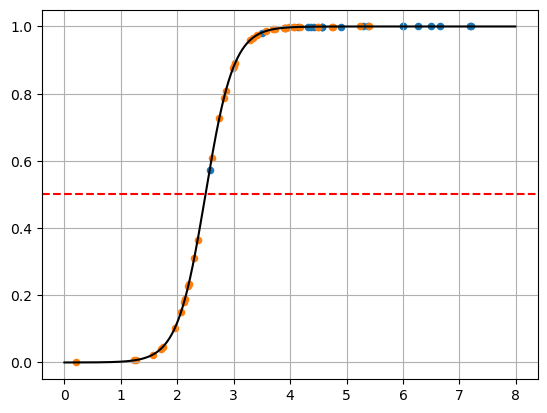

In [24]:
pp= 1/(1+np.exp(-(b0+b1*poss)))
pn= 1/(1+np.exp(-(b0+b1*negs)))
plt.plot(x, p, c="k")
plt.scatter(poss, pp, s = 20)
plt.scatter(negs, pn, s = 20)
plt.axhline(.5,  linestyle="--", color="r")
plt.grid()
plt.show()


The predictions are then the sigmoid function values resulting from the log odds which was fitted as a straight line.


In [25]:
#let's first put all elements in a common X, y structure for later using with scikit-learn
X=np.vstack((poss, negs))
y=np.hstack((yp, yn))

#now we can make predictions
preds=(1/(1+np.exp(-(b0+b1*X)))>0.5)
preds=preds.flatten().astype('int32')
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

How good is this model? We need to compute the typical statistics

**WARNING**: The procedure followed is for illustration purposes only. We are using the training data for evaluating the quality, which in actual model fitting should never be done. Even though this model has only two parameters and 60 observations, this is not the correct procedure for evaluating its quality. We will be consistent though and, for all remaining examples, the same procedure be followed.  

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score
import pandas as pd
def printClassResults(truth, preds):
    print("The Accuracy is: %7.4f" % accuracy_score(truth, preds))
    print("The Precision is: %7.4f" % precision_score(truth, preds))
    print("The Recall is: %7.4f" % recall_score(truth, preds))
    print("The F1 score is: %7.4f" % f1_score(truth, preds))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(truth, preds))
    print()
    print("This is the Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(truth, preds)))

printClassResults(y, preds)

The Accuracy is:  0.5667
The Precision is:  0.4348
The Recall is:  1.0000
The F1 score is:  0.6061
The Matthews correlation coefficient is:  0.3901

This is the Confusion Matrix
    0   1
0  14  26
1   0  20


## Exercise 3

What if we change one of the parameters?
Use $\beta_0$ = `-6.0`, and  $\beta_1$ = `2.0`
To make new predictions is trivial, we just use the new parameters in the formula to get new predictions and print the results

In [27]:
#complete code here...

#uncomment the following line to evaluate the new model
#printClassResults(y, new_preds) uncomment to 

### 4.2. Logistic Regression on sickit-learn


Differently from Linear Regression, the process for finding the best possible solution is heuristic, using typically gradient descent approaches. We can use scikit learn for finding the best possible parameters for the above problem

In [28]:
from sklearn.linear_model import LogisticRegression
mdl = LogisticRegression()
mdl.fit(X, y)

b0=mdl.intercept_[0]
b1=mdl.coef_[0][0]
print("Intercept (b0): %7.4f"% b0) 
print("Slope     (b1): %7.4f"% b1) 


Intercept (b0): -5.9367
Slope     (b1):  1.2886


We can furthermore see the curve and how it compares to the original model

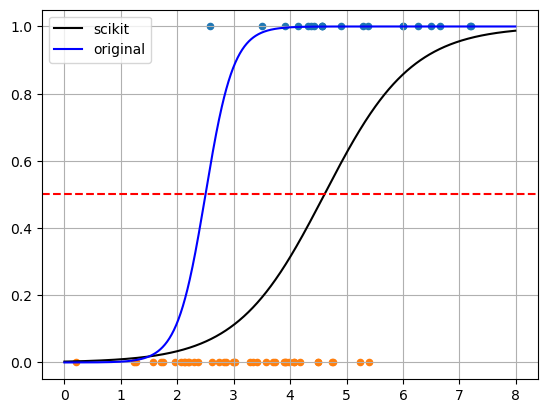

In [29]:
pp= 1/(1+np.exp(-(b0+b1*poss)))
pn= 1/(1+np.exp(-(b0+b1*negs)))

#this is the scikit fitted curve
p_sk= 1/(1+np.exp(-(b0+b1*x)))

#below is the original curve
p_or= 1/(1+np.exp(-(-10.0+4.0*x)))

plt.plot(x, p_sk, c="k", label="scikit")
plt.plot(x, p_or, c="b", label="original")
plt.scatter(poss, yp, s = 20)
plt.scatter(negs, yn, s = 20)
plt.axhline(.5,  linestyle="--", color="r")
plt.grid()
plt.legend()
plt.show()


Finally we can compare these results to the values

In [30]:
sk_preds=mdl.predict(X)
printClassResults(y, sk_preds)

The Accuracy is:  0.7667
The Precision is:  0.7143
The Recall is:  0.5000
The F1 score is:  0.5882
The Matthews correlation coefficient is:  0.4458

This is the Confusion Matrix
    0   1
0  36   4
1  10  10


### Discussion

Compare the results obtained and discuss them
    * What to you think is happening in scikit-learn
    * how relevant is the aspect of the curve to the overal statistics. Focus in particular on precision and recall

### 4.2 Scikit-learn example on multidimensional data

Scikit is able to fit logistic regression parameters to multidimensional data and with multiclass objectives. However some care must be taken when there is more than one independent variable. Due to the learning process, it is fundamental that the data is apropriately scaled

Furthermore, now we will use tradidional cross validation to evaluate our models

#### 4.2.1 Scaling data

Due to the process of model fitting it is required that the X matrix has been scaled to 0 mean and variance of 1. Scikit learn has a tool that is able to accomplish this (`StandardScaler`) but we must be careful to maintain a separation between training and testing or the Scaling process will be a source of error.

The correct procedure for scaling data is as follows
1. Separate full data set into training and testing
2. Use the training set to fit the scaler
3. Apply the scaler to the training set (transform)
4. Apply the scaler to the testing set (transform)

We are going to use the Breast Cancer data set from the scikit learn toy data sets

In [31]:
from sklearn.datasets import load_breast_cancer
X_bc,y_bc = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size=0.33, random_state=22)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) #fit scaler on training set
X_train = scaler.transform(X_train)  #apply scaler on training set
X_test = scaler.transform(X_test) #apply scaler on test set

X_bc.shape

(569, 30)

#### 4.2.2. Fitting the model

Now let's fit the model to the training data properly scaled

In [32]:
mdl= LogisticRegression(random_state=0).fit(X_train, y_train)

We can print the coefficients of the model. Please note that we would require several sets of parameters if the problem is multiclass. For 3 classes we would require 3 parameter sets. This will force us to use a slightly different way to have access to each of the actual model coefficients

Also note that as all variables are centered in zero and with similar variance it is possible to identify the variables that may have strongest impact on the model as these are the ones with higher absolute value on the coeficients

In [33]:
print("The bias is: ",  mdl.intercept_[0])
print("The other parameters are: ")
for i, beta in enumerate(mdl.coef_[0]):
    print("\t B%02d -> %9.3f"% (i+1, beta))


The bias is:  1.0957674199727243
The other parameters are: 
	 B01 ->    -0.713
	 B02 ->    -0.616
	 B03 ->    -0.650
	 B04 ->    -0.651
	 B05 ->    -0.125
	 B06 ->     0.440
	 B07 ->    -0.683
	 B08 ->    -0.772
	 B09 ->     0.202
	 B10 ->     0.385
	 B11 ->    -1.077
	 B12 ->     0.080
	 B13 ->    -0.782
	 B14 ->    -0.844
	 B15 ->    -0.326
	 B16 ->     0.527
	 B17 ->    -0.066
	 B18 ->    -0.130
	 B19 ->     0.423
	 B20 ->     0.708
	 B21 ->    -0.975
	 B22 ->    -1.040
	 B23 ->    -0.791
	 B24 ->    -0.913
	 B25 ->    -1.093
	 B26 ->     0.077
	 B27 ->    -0.915
	 B28 ->    -0.652
	 B29 ->    -0.947
	 B30 ->    -0.344


In [34]:
coefs=[(abs(beta),i) for i, beta in enumerate(mdl.coef_[0])]
coefs.sort()
coefs.reverse()
for beta, i in coefs[:5]:
    print("\t B%02d -> %9.3f"% (i+1, beta))

	 B25 ->     1.093
	 B11 ->     1.077
	 B22 ->     1.040
	 B21 ->     0.975
	 B29 ->     0.947


And we can make predictions

In [35]:
preds = mdl.predict(X_test)

printClassResults(y_test, preds)

The Accuracy is:  0.9574
The Precision is:  0.9391
The Recall is:  0.9908
The F1 score is:  0.9643
The Matthews correlation coefficient is:  0.9138

This is the Confusion Matrix
    0    1
0  72    7
1   1  108
